In [27]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
df = pd.read_csv('C:/Users/utilisateur/Desktop/Andrea/occaz_auto/model/brief_auto_clean.csv', sep = ';')

In [29]:
df.head()

,Marque,Model,Année,Kilométrage,Code Postal,Prix
0,BMW X3 G01,(G01) XDRIVE30DA 265 M SPORT,2020,27930,66,61620
1,VOLKSWAGEN T-CROSS,1.0 TSI 110 CARAT DSG,2020,20570,25,30120
2,BMW SERIE 5 F11 TOURING,(F11) (2) TOURING 530D XDRIVE 258 EXECUTIVE BVA8,2017,116492,78,32540
3,NISSAN QASHQAI 2,II 1.5 DCI 110 N-CONNECTA,2015,104610,31,16550
4,VOLKSWAGEN GOLF 8 R,VIII 2.0 TSI 320 R DSG7,2020,59,92,81300


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Marque       368 non-null    object
 1   Model        368 non-null    object
 2   Année        368 non-null    int64 
 3   Kilométrage  368 non-null    int64 
 4   Code Postal  368 non-null    int64 
 5   Prix         368 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 17.4+ KB


In [31]:
df.isna().sum() 
df.isna().any()

Marque         False
Model          False
Année          False
Kilométrage    False
Code Postal    False
Prix           False
dtype: bool

In [32]:
df['Année'].value_counts()

2018    70
2019    52
2020    45
2017    42
2016    32
2015    24
2021    24
2022    24
2014    13
2011    11
2013    10
2010     4
2007     4
2009     3
2023     2
2012     2
1956     1
2001     1
1998     1
2006     1
2002     1
2003     1
Name: Année, dtype: int64

In [33]:
df.sort_values('Prix', ascending=False)

,Marque,Model,Année,Kilométrage,Code Postal,Prix
43,FERRARI CALIFORNIA T,(2) 3.9 V8 T 560,2016,8468,68,462830
250,FERRARI ROMA,COUPE 3.9 DCT,2020,7966,95,371980
212,FERRARI GTC4,V12 690CH LUSSO 6.0,2018,42308,6,239440
342,PORSCHE 911 TYPE 992 TARGA,(992) 3.0 450 TARGA 4S,2021,15390,75,237120
55,PORSCHE 911 TYPE 992 CABRIOLET,(992) CABRIOLET 3.0 450 CARRERA 4S PDK,2021,9266,27,220230
...,...,...,...,...,...,...
292,RENAULT KANGOO 2,II (2) 1.5 DCI 90 ENERGY FT INTENS,2016,167813,24,9700
278,FORD B-MAX,1.5 TDCI 95 S&S EDITION,2014,186250,57,9470
125,DACIA DUSTER,1.5 DCI 110 FAP 4X2 AMBIANCE,2013,140679,66,9340
27,RENAULT SCENIC 3,III 1.9 DCI 130 FAP DYNAMIQUE,2010,142999,77,8130


In [34]:
df['Marque'] = df['Marque'].apply(lambda x : x.split(' ')[0])
df['Marque']

0             BMW
1      VOLKSWAGEN
2             BMW
3          NISSAN
4      VOLKSWAGEN
          ...    
363       PEUGEOT
364       RENAULT
365         SKODA
366          AUDI
367    VOLKSWAGEN
Name: Marque, Length: 368, dtype: object

In [35]:
df['Marque'].value_counts()

PEUGEOT         54
AUDI            47
RENAULT         44
MERCEDES        32
CITROEN         28
VOLKSWAGEN      25
PORSCHE         19
BMW             13
OPEL            11
LAND            10
MINI            10
TOYOTA           7
FORD             7
FIAT             6
KIA              6
MAZDA            5
NISSAN           5
JAGUAR           4
SKODA            4
DS               4
JEEP             4
FERRARI          3
MASERATI         3
DODGE            3
DACIA            3
CHEVROLET        2
SEAT             2
CADILLAC         1
VOLVO            1
HONDA            1
ASTON            1
SUBARU           1
CUPRA            1
MERCEDES-AMG     1
Name: Marque, dtype: int64

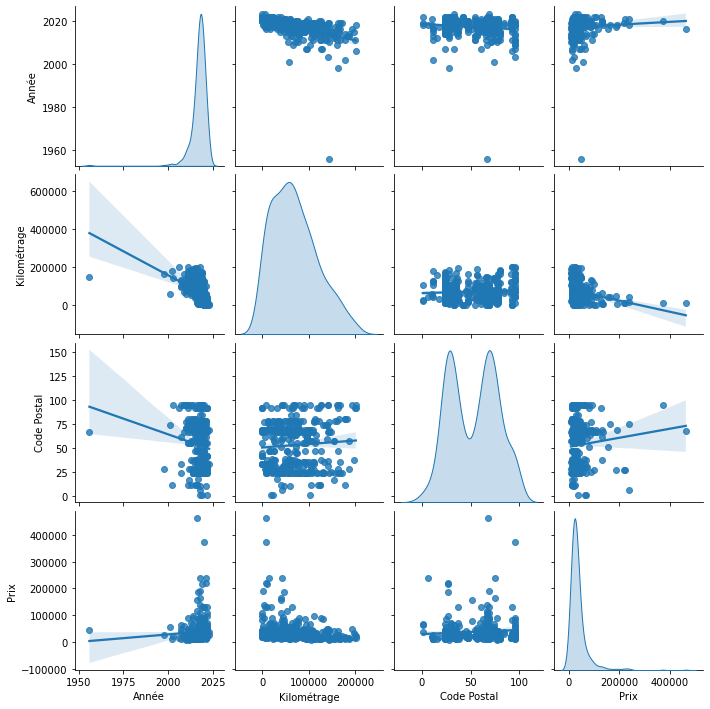

In [36]:
sns.pairplot(df, kind='reg', diag_kind='kde');

In [37]:
df['Code Postal'].value_counts()

24    45
69    35
78    26
66    22
95    19
33    18
35    15
47    12
57    11
67    10
28    10
92     9
31     8
37     8
63     8
55     8
27     8
25     8
74     8
30     7
11     6
91     6
77     6
80     5
45     4
71     4
42     4
26     4
61     4
72     3
38     3
1      3
60     3
59     3
51     2
75     2
84     2
10     2
76     2
36     1
68     1
6      1
18     1
16     1
Name: Code Postal, dtype: int64

In [38]:
dummy_CodePostal = pd.get_dummies(df['Code Postal'])
dummy_CodePostal

,1,6,10,11,16,18,24,25,26,27,...,74,75,76,77,78,80,84,91,92,95
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
df.describe()

,Année,Kilométrage,Code Postal,Prix
count,368.000000,368.000000,368.000000,368.000000
mean,2017.201087,69490.557065,52.864130,37550.434783
std,4.739284,48423.943262,24.213245,43953.172584
min,1956.000000,1.000000,1.000000,7870.000000
25%,2016.000000,30193.000000,30.000000,17475.000000
50%,2018.000000,63175.500000,57.000000,25495.000000
75%,2020.000000,100534.000000,69.500000,37615.000000
max,2023.000000,201049.000000,95.000000,462830.000000


In [40]:
df['Model'].value_counts()

II 1.2 PURETECH 100 S&S GT                                            3
IV 1.5 DCI 115 BLUE INTENS EDC                                        3
2.0 D240 14CV 4WD SE R-DYNAMIC AUTO                                   2
II 2.0 BLUEHDI 180 S&S GT EAT6                                        2
II (3) 1.6 BLUEHDI 100 S&S BUSINESS M                                 2
                                                                     ..
III COOPER S 192 BVA7 5P                                              1
II (2) 33 L2H2 BLUEHDI 130 BUSINESS BV6                               1
1.5 109 CDI 90 LONG                                                   1
III 180 D AMG LINE EDITION 7G-DCT                                     1
VII (2) 1.6 TDI 115 BLUEMOTION TECHNOLOGY CONFORT BUSINESS DSG7 5P    1
Name: Model, Length: 353, dtype: int64

In [41]:
df = pd.get_dummies(df, columns=['Marque'], drop_first=True)


In [42]:
df.sort_values('Année')

,Model,Année,Kilométrage,Code Postal,Prix,Marque_AUDI,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,...,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_SEAT,Marque_SKODA,Marque_SUBARU,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO
97,COUPE,1956,144461,67,46330,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
298,COUPE 4.0 BVA,1998,162564,28,26600,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
228,(996) (2) 3.6 CARRERA TARGA,2001,57875,74,56120,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
303,(2) ML 270 CDI BVA,2002,178244,11,11880,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
315,II 500 BVA,2003,141482,95,21760,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,II (2) 1.0 FIREFLY TURBO 100 S/S LIFE PLUS,2022,56,92,22260,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,III C E 95 (RED),2022,55,92,24570,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,1.5 BLUEHDI 130 S&S 7CV FEEL EAT8,2022,40625,24,36980,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
154,II 1.2 PURETECH 100 S&S ALLURE PACK MY21,2023,12,33,24760,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [43]:
df.drop(labels = 97, axis=0)

,Model,Année,Kilométrage,Code Postal,Prix,Marque_AUDI,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,...,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_SEAT,Marque_SKODA,Marque_SUBARU,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO
0,(G01) XDRIVE30DA 265 M SPORT,2020,27930,66,61620,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0 TSI 110 CARAT DSG,2020,20570,25,30120,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,(F11) (2) TOURING 530D XDRIVE 258 EXECUTIVE BVA8,2017,116492,78,32540,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,II 1.5 DCI 110 N-CONNECTA,2015,104610,31,16550,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,VIII 2.0 TSI 320 R DSG7,2020,59,92,81300,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,(2) 2.0 HDI 163 FAP SIGNATURE BVA,2011,124177,11,10420,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
364,IV 1.2 TCE 130 ENERGY INTENS EDC,2018,47580,31,20110,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
365,III (2) COMBI 2.0 TDI SCR 150 8CV BUSINESS DSG7,2020,17918,30,33970,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
366,(2) 2.0 TDI ULTRA 150 AMBIENTE,2015,81339,78,27810,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df.drop(['Model'], axis = 1, inplace = True)
df.head()

,Année,Kilométrage,Code Postal,Prix,Marque_AUDI,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,Marque_CUPRA,...,Marque_OPEL,Marque_PEUGEOT,Marque_PORSCHE,Marque_RENAULT,Marque_SEAT,Marque_SKODA,Marque_SUBARU,Marque_TOYOTA,Marque_VOLKSWAGEN,Marque_VOLVO
0,2020,27930,66,61620,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,20570,25,30120,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2017,116492,78,32540,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015,104610,31,16550,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020,59,92,81300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
X = df.drop(['Prix'], axis=1)
y = df.Prix

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=10)

In [47]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test,y_test))

0.7726343562303549
0.7450493902451882
